# 3. Machine Learning for Classification
- we are a telcom company, churn is when a client stops using our services.
- We'll use logistic regression to predict which customers are likely to churn.
- apparently we're going to obtain a probability of churn for each customer.
- suppose we identify high probability clients and send them a promotional email.
- our response variable, y, can take values 0 (did not leave) or 1 (did leave).
- our X matrix is features about the customer, their account details, services subscribed, etc.


## 3.1 Churn prediction project

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


## 3.2 Data preparation

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [6]:
!pip install pygam

In [7]:
df = pd.read_csv('~/OneDrive/Statistics/Machine Learning/mlbookcamp-code-master/data_telco_customers.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- (above) it's not easy to see all the columns...
- (below) here's a recommended view for summarizing a dataset.

In [8]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


- (below) standardize characters in columns and values.

In [9]:
df.dtypes[df.dtypes == 'object'].index

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [11]:
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [12]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [13]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [14]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

- (above) TotalCharges should be a number, not string...
- (above) in this dataset, a space represents missing values which were found and replaced with underscores.
- (below) using .to_numeric() below fails because of this.
- (below) we need to coerce errors to NaN

In [15]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [16]:
tc.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: totalcharges, Length: 7043, dtype: bool

In [17]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


- (above) Here is a better look...
- (below) coerce to NaN, fill with zero.

In [18]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [19]:
df.totalcharges = df.totalcharges.fillna(0)

In [20]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

- replace "Yes" "No" with 0, 1

In [21]:
df.churn = (df.churn == 'yes').astype(int)

In [22]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

## 3.3 Setting up the validation framework

- (below) Perform the train/validation/test split with Scikit-Learn
- (below) use question mark to get information about a function!

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_test_split?

In [25]:
df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=1)

# .25 of .80 = .20; so test = 0.20, val = 0.20, train = 0.60.
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [26]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [27]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [30]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

- (above) We're not dropping the churn variable from df_full_train because we're going to do some EDA on that dataframe.

## 3.4 EDA

* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

In [31]:
df_full_train = df_full_train.reset_index(drop=True)

- resetting the indices isn't necessary, but instructor does it.

In [32]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

- (above) no missing values found.
- (below) lets look at the response.
- (below) normalize just provides relative percentage.

In [33]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [34]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [35]:
df_full_train.churn.mean()

0.26996805111821087

- (above) the relative proportion of those who churned is called the "churn rate"

In [36]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [37]:
numerical = ['tenure', 'monthlycharges', 'totalcharges'] # dtypes int64, float64

In [38]:
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [39]:
list(df_full_train.dtypes[(df.dtypes == 'float64') | (df_full_train.dtypes == 'int64')].index)

['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']

- (above) we can almost use that command, but tenure is an integer.

In [40]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

list(df_full_train.dtypes[(df.dtypes == 'object')].index)

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

- (above) same problem, can't use the easy way to list columns.
- (below) number of unique values for our categorical variables.

In [41]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable and are important to the model

* Churn rate difference: global - group
* Risk ratio
* Mutual information - later

#### Churn rate

In [42]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


- examine churn_rate of each group.

In [43]:
global_churn = df_full_train.churn.mean()  # calculated above as well.
global_churn

0.26996805111821087

In [44]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
print('gender == female:', round(churn_female, 3))

gender == female: 0.277


In [45]:
global_churn - churn_female

-0.006855983216553063

In [46]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
print('gender == male:  ', round(churn_male, 3))

gender == male:   0.263


In [47]:
global_churn - churn_male

0.006754520462819769

In [48]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [49]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
print('partner == yes:', round(churn_partner, 3))

partner == yes: 0.205


In [50]:
churn_partner - global_churn

-0.06493474245795922

In [51]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
print('partner == no :', round(churn_no_partner, 3))

partner == no : 0.33


In [52]:
churn_no_partner - global_churn

0.05984095297455855

- (above) gender isn't very important for predicting churn
- (above) whether or not someone lives with a partner seems to have a relationship with churn rate.
- (above) if the difference between group churn (partner or no partner) and global churn is positive, they are more likely to churn.  If it is negative they are less likely to churn.

#### Risk ratio - (group churn) / (global churn)

In [53]:
churn_no_partner / global_churn

1.2216593879412643

- (above) churn rate is 22% higher for those who live without a partner.
- (below) churn rate is 24% lower for those who live with a partner.

In [54]:
churn_partner / global_churn

0.7594724924338315

- (below)SQL query to get avg. churn for one variable

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [55]:
from IPython.display import display

- above the display function is needed because we want to display the tables that are looped through.  without this function, it would just display the last.
- **(below) a Python example of a SQL "group by" query.**

In [56]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print() # blank
    print() # blank

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature importance: Mutual information (categorical variables)
- tells us how much we can learn about one variable if we know the value of another
-  It can be used to characterize both the relevance and redundancy of variables, such as the minimum redundancy feature selection.
- https://en.wikipedia.org/wiki/Mutual_information
- higher = more information shared between the two.

In [57]:
from sklearn.metrics import mutual_info_score
mutual_info_score?

In [58]:
print(mutual_info_score(df_full_train.churn, df_full_train.gender))
print(mutual_info_score(df_full_train.gender, df_full_train.churn))

0.0001174846211139946
0.0001174846211139946


In [59]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [60]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [61]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

- (above) the contract variable tells us the most about churn
- (below) can calculate the mutual information for all predictor variables.

- (below) An apply function similar to R exists but it only takes one argument.
- (below) the function we want to apply takes two arguments, so we have to wrap it in a function that fills the 2nd argument in.

In [62]:
def mutual_info_churn_score(col_names):
    return mutual_info_score(col_names, df_full_train.churn)

- (below) the apply function being used...

In [63]:
mute_info = df_full_train[categorical].apply(mutual_info_churn_score)
mute_info.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation (Numerical variables)

How about numerical columns?

- Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
- measures linear dependence between variables.
- essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1
- rule of thumb: low correlation is 0.0 - 0.2; X rarely increases with Y  
- rule of thumb: moderate correlation is 0.2 - 0.5;  X sometimes increases with Y  
- rule of thumb: high correlation is 0.5 - 1.0; X always increases with Y  

In [64]:
df_full_train.tenure.max()

72

- (below) Y is 1 when customer is a churner.  
- (below) the longer a customer stays with us, and the more they pay total, the LESS likely they are to churn.
- (below) higher bills more correlated with churn.

In [65]:
df_full_train[numerical].corrwith(df_full_train.churn).abs() #sign not important for feature selection 

df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

- (below) churn rate for customers with us two months or less.

In [66]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

- (below) churn rate for customers with us 2 - 12 months.

In [67]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

- (below) churn rate for customers with more than 12 months.

In [68]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

- (below) churn rate for customers with cheap bills, less than 20

In [69]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

- (below) churn rate for customers with moderate bills, $20-50

In [70]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

- (below) churn rate for customers with high bills, $50 or more

In [71]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

- (above) we just illustrated that churn rate is negatively correlated with tenure and positively correlated with monthly bill.

## 3.8 One-hot encoding and Feature Scaling

* Use Scikit-Learn to encode categorical features

In [72]:
from sklearn.feature_extraction import DictVectorizer

In [73]:
example_dict = df_train[['gender', 'contract']].iloc[:100].to_dict(orient = 'records')
example_dict

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [74]:
dv_ex = DictVectorizer(sparse = False) # make class object; sparse matrix is special data object/container

dv_ex.fit(example_dict)

X_ex = dv_ex.transform(example_dict)

type(X_ex)

print(dv_ex.get_feature_names())

print(X_ex)

['contract=month-to-month', 'contract=one_year', 'contract=two_year', 'gender=female', 'gender=male']
[[0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.

C:\Users\jonsch\anaconda3\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [75]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')

X_train = dv.fit_transform(train_dict) # fit_transform combines the functionality of fit and transform.


val_dict = df_val[categorical + numerical].to_dict(orient='records')

X_val = dv.transform(val_dict)

### Feature Scaling (Not covered in lecture)

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

 - (below) First, we prepare the numerical variables. We'll use the scaler for that and write the results to `X_train_num`:

In [78]:
X_train_num = df_train[numerical].values

scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_num = scaler.fit_transform(X_train_num)

 - (above) The scaler scales the numerical features. 
 - (below) Compare the un-scaled version of latitude with the scaled one:
 - (below) "latitude" below needs to be changed to a numerical feature from this dataset.

In [79]:
df_train.latitude.values

AttributeError: 'DataFrame' object has no attribute 'latitude'

In [ ]:
X_train_num[:, 0]

 - (below) Now let's process categorical features using `OneHotEncoding`.
- (below) We'll write the results to `X_train_cat`:

In [ ]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
X_train_cat = ohe.fit_transform(df_train[categorical].values)

In [ ]:
ohe.get_feature_names()

- (below) Now we need to combine two matrices into one - `X_train`:

In [ ]:
X_train = np.column_stack([X_train_num, X_train_cat])

- (below) And now let's train the model:

In [ ]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)

- (below) We can check it's accuracy:

In [ ]:
X_val_num = df_val[numerical].values
X_val_num = scaler.transform(X_val_num)

X_val_cat = ohe.transform(df_val[categorical].values)

X_val = np.column_stack([X_val_num, X_val_cat])

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]
accuracy_score(y_val, y_pred >= 0.5)

- (above) is the model version with the scaled versions better or worse? 

## 3.9 Logistic regression

* Binary classification
* Linear vs logistic regression
* the inverse of the logit function is the sigmoid function
* the sigmoid function maps any -inf to inf value into 0 to 1
* for a probability p, in stats we model logit(p) = XBeta
* then sigmoid(XBeta) = p

In [80]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [81]:
sigmoid(-100)

3.7200759760208356e-44

In [82]:
sigmoid(10000)

1.0

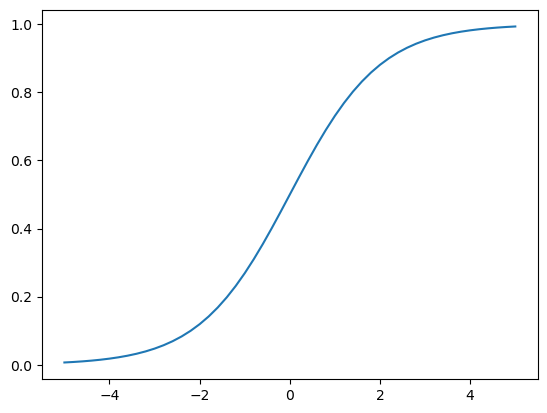

In [83]:
z = np.linspace(-5, 5, 51)
plt.plot(z, sigmoid(z))

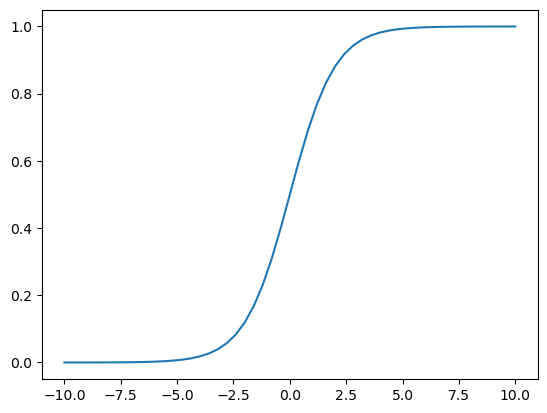

In [84]:
z = np.linspace(-10, 10, 51)
plt.plot(z, sigmoid(z))

In [85]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [86]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [87]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

In [88]:
model = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

LogisticRegression()

In [89]:
model.intercept_

array([-0.1089761])

In [90]:
model.intercept_[0] # its a 2d array, we only need 1 row tho.

-0.1089760954030114

In [91]:
model.coef_[0].round(3) # same

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

- (below) binary predictions, 0 or 1. sometimes called **hard** predictions.

In [92]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

- (below) the actual probabilities.

In [93]:
model.predict_proba(X_train)

array([[0.90467862, 0.09532138],
       [0.32051824, 0.67948176],
       [0.36617081, 0.63382919],
       ...,
       [0.46835456, 0.53164544],
       [0.95738015, 0.04261985],
       [0.30105881, 0.69894119]])

In [94]:
y_train_pred = model.predict_proba(X_train)[:, 1]
y_train_pred

array([0.09532138, 0.67948176, 0.63382919, ..., 0.53164544, 0.04261985,
       0.69894119])

In [95]:
# y_val_pred = model.predict_proba(X_val)[:, 0] # probability of NOT churn
y_val_pred = model.predict_proba(X_val)[:, 1] # probability of churn

- (below) one way to score...

In [96]:
churn_decision = (y_val_pred >= 0.5)

In [97]:
churn_decision

array([False, False, False, ..., False,  True,  True])

In [98]:
(y_val == churn_decision).mean()

0.8034066713981547

- (below) A useful view...

In [99]:
df_val[churn_decision].head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15


- make a prediction table; that is , how many predictions were correct?

In [100]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_val_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [101]:
df_pred

,probability,prediction,actual,correct
0,0.008994,0,0,True
1,0.204768,0,0,True
2,0.212504,0,0,True
3,0.543161,1,1,True
4,0.214049,0,0,True
...,...,...,...,...
1404,0.313926,0,0,True
1405,0.039363,0,1,False
1406,0.136401,0,0,True
1407,0.799907,1,1,True


In [102]:
df_pred.correct.mean()

0.8034066713981547

## 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

In [ ]:
a = [1, 2, 3, 4]
b = 'abcd'

In [ ]:
dict(zip(a, b))

In [103]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

C:\Users\jonsch\anaconda3\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.285,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


- we're going to train a smaller model for discussion.

In [121]:
subset = ['contract', 'tenure', 'monthlycharges']

In [123]:
df_train[subset].iloc[:10].to_dict(orient='records') # 10 OBS X 3 COVARIATES

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [125]:
dicts_train_small = df_train[subset].to_dict(orient='records')
dicts_val_small = df_val[subset].to_dict(orient='records')

In [126]:
dv_small = DictVectorizer(sparse=False)
X_train_small = dv_small.fit_transform(dicts_train_small)
X_train_small # 10 OBS X (3 BINARY + 2 NUMERICAL) COVARIATES

array([[  0.  ,   0.  ,   1.  , 115.5 ,  72.  ],
       [  1.  ,   0.  ,   0.  ,  95.25,  10.  ],
       [  1.  ,   0.  ,   0.  ,  75.55,   5.  ],
       ...,
       [  1.  ,   0.  ,   0.  ,  90.  ,   2.  ],
       [  0.  ,   0.  ,   1.  ,  24.5 ,  27.  ],
       [  1.  ,   0.  ,   0.  ,  80.85,   9.  ]])

In [127]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

- model trained, lets look at the coefficents

In [128]:
w0 = model_small.intercept_[0]
print(w0)
print(sigmoid(w0))

-2.4767756587999803
0.07750241514735107


- (above) without knowing anything about a customer, the probability they will churn is fairly low, at 7.7%.

In [129]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [119]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [120]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [113]:
i = 1

X_i = X_train_small[i,:]
X_i

array([ 1.  ,  0.  ,  0.  , 95.25, 10.  ])

In [114]:
print("bias: {}" .format(sigmoid(w0)))

bias: 0.07750241514735107


In [115]:
print("bias + m2m contract: {}" .format(sigmoid(w0 + 0.97)))

bias + m2m contract: 0.1814171320273239


In [116]:
w0 + (w[0] * X_i[0]) + (w[1] * X_i[1]) + (w[2] * X_i[2]) + (w[3] * X_i[3]) + (w[4] * X_i[4])

0.7491220236200505

In [117]:
sigmoid(_) # in jupyter notebook underscore inputs the last cell's output.

0.6789873624297755

## 3.12 Using the model

In [130]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [131]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [132]:
y_full_train = df_full_train.churn.values

In [133]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [134]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [135]:
X_test = dv.transform(dicts_test) # no fit_transform because we fit to the full train + val set.

In [136]:
y_test_pred = model.predict_proba(X_test)[:, 1]

In [138]:
churn_decision = (y_test_pred >= 0.5)

In [139]:
(churn_decision == y_test).mean()

0.815471965933286

- (above) accuracy on validation and test set are pretty comparable.

In [140]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

- a customer inquiry is sent to the server as a python dictionary...

In [141]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

- we don't need to turn this into a data frame because we have the dictionary converter.

In [142]:
X_i = dv.transform([customer])

In [143]:
model.predict_proba(X_i)[0, 1]

0.5968852088245516

In [146]:
model.predict_proba(X_i)

array([[0.40311479, 0.59688521]])

In [144]:
y_test[-1]

1

- model predicts the customer will churn, and it was right.

## 3.13 Model Evaluation

### Summary Far, Logistic Regression

* Feature importance - risk, mutual information, correlation
* One-hot encoding can be implemented with `DictVectorizer`
* Logistic regression - linear model like linear regression
* Output of log reg - probability
* Interpretation of weights is similar to linear regression

# 4. Evaluation Metrics for Classification

In the previous session we trained a model for predicting churn. How do we know if it's good?


## 4.1 Evaluation metrics: session overview 

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


*Metric* - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

### Catch-up code: Getting a model to evaluate

In [147]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('~/OneDrive/Statistics/Machine Learning/mlbookcamp-code-master/data_telco_customers.csv')


df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

- (below) soft predictions for our model, using the validation set.

In [148]:
y_pred = model.predict_proba(X_val)[:, 1]

- (below) hard predictions, with a logical classification threshold of 0.5

In [149]:
churn_decision = (y_pred >= 0.5)
churn_decision.mean()

0.2207239176721079

- (below) prediction accuracy, what proportion of our predictions match the withheld validation set? 

In [150]:
(y_val == churn_decision).mean()

0.8034066713981547

## 4.2 Accuracy and dummy model

* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines

- (below) prediction accuracy, method 1

In [151]:
(y_val == churn_decision).mean()

0.8034066713981547

- (below) prediction accuracy, method 2

In [152]:
n_total_pred = len(y_val)
n_total_pred

1409

In [153]:
n_correct_pred = sum(y_val == churn_decision)
n_correct_pred

1132

In [154]:
n_correct_pred / n_total_pred

0.8034066713981547

- (below) prediction accuracy, method 3

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

### is using 0.5 a good decision rule?

In [156]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.510
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.796
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.734
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


- (above) looks like it is!

Text(0, 0.5, 'percent accuracy')

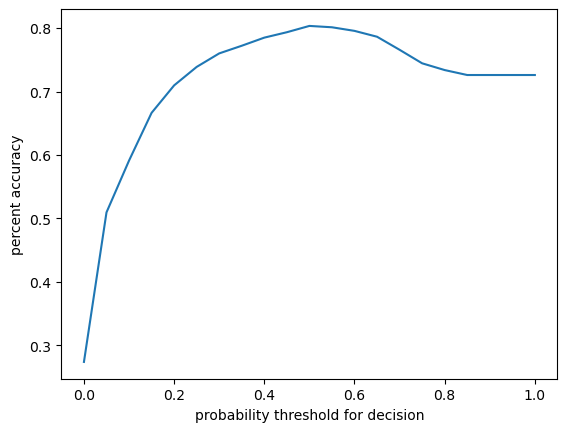

In [157]:
plt.plot(thresholds, scores)

plt.xlabel("probability threshold for decision")

plt.ylabel("percent accuracy")

In [159]:
from collections import Counter

- (above) counter can count things...like the number of instances of false in a vector.
- (below) there should be no values with 1.0 probability
- (below) consider this our dummy model, it predicts all customers as non-churn

In [161]:
len(y_pred)

1409

In [162]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [163]:
1 - y_val.mean()

0.7260468417317246

In [164]:
y_val.mean()

0.2739531582682754

- (below) notice the class imbalance! 3x as many non-churn customers.

In [165]:
print('non-churn customers: {}' .format(np.bincount(y_val)[0]))
print('churn customers: {}' .format(np.bincount(y_val)[1]))
print('there are {:.2f} times as many non-churn customers as churn customers'.format(np.bincount(y_val)[0] / np.bincount(y_val)[1]))

non-churn customers: 1023
churn customers: 386
there are 2.65 times as many non-churn customers as churn customers


- (above) our dummy model is the decision rule such that all customers are predicted as non-churn (no customer has a probability of 1.0).
- (above) from our observed data; 72.6% of customers identified as non-churn
- (above) why should we bother if our fitted model is only 80% accurate?
- (below) we have to look beyond accuracy for the answer.
- **IMPORTANT: accuracy can be a misleading metric when class imbalance is severe.**

## 4.3 Confusion table

* Different types of errors and correct decisions
* Arranging them in a table

In [166]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

- (below) t is our decision threshhold

In [167]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [168]:
n_true_pos = (predict_positive & actual_positive).sum()
n_true_neg = (predict_negative & actual_negative).sum()

n_false_pos = (predict_positive & actual_negative).sum()
n_false_neg = (predict_negative & actual_positive).sum()

In [169]:
confusion_matrix = np.array([
    [n_true_neg, n_false_pos],
    [n_false_neg, n_true_pos]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

In [170]:
(confusion_matrix / n_total_pred).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

In [171]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

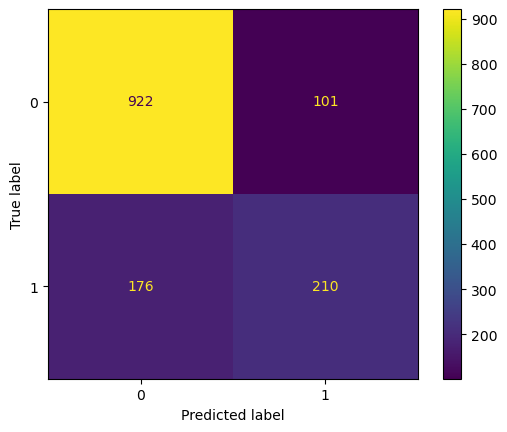

In [172]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, y_pred >= t)
plt.show()

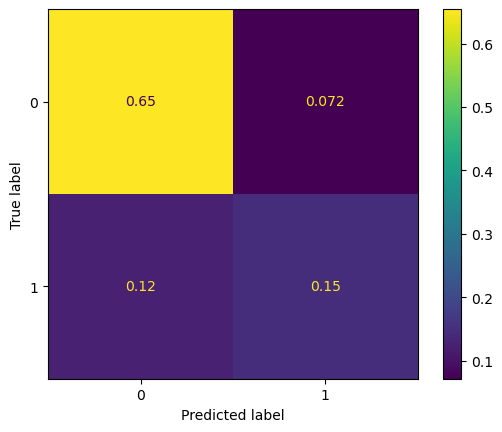

In [173]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred >= t, normalize = 'all')
plt.show()

- (above) we can recover the accuracy by adding the true negative and true positive normalized values.
- (above) false negatives are people we think are not going to churn but are.
- (above) false positives are people we think are going to churn but don't.
- (above) its harder to catch false negatives than false positives.

## 4.4 Precision and Recall
- (below) for now, let's think about accuracy as this: TP + TN / TP + TN + FN + FP

In [174]:
accuracy = (n_true_pos + n_true_neg) / (n_true_pos + n_true_neg + n_false_pos + n_false_neg)
accuracy

0.8034066713981547

- (below) precision: proportion of positive classifications that were made correctly.

In [175]:
precision = n_true_pos / (n_true_pos + n_false_pos)
precision

0.6752411575562701

- (above) ~33% of people predicted to churn, actually will not churn.
- (below) recall: percentage of actual positive class members that were correctly identified.

In [176]:
recall = n_true_pos / (n_true_pos + n_false_neg)
recall

0.5440414507772021

- (above) we failed to identify ~46% of people that are churning.

## 4.5 ROC Curves
- reciever-operator characteristics

### TPR and FRP
- compute from confusion matrix

In [177]:
true_pos_rate = n_true_pos / (n_true_pos + n_false_neg) 
true_pos_rate # same value as recall above

0.5440414507772021

In [178]:
false_pos_rate = n_false_pos / (n_false_pos + n_true_neg)
false_pos_rate 

0.09872922776148582

- (above) ideally, we want false positives to be low and true positives to be high.

In [179]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [180]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

- (below) a cool coding trick, display every 10 records of a pandas dataframe

In [181]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,151,53,235,970,0.391192,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,2,373,1021,0.033679,0.001955
90,0.9,0,0,386,1023,0.000000,0.000000


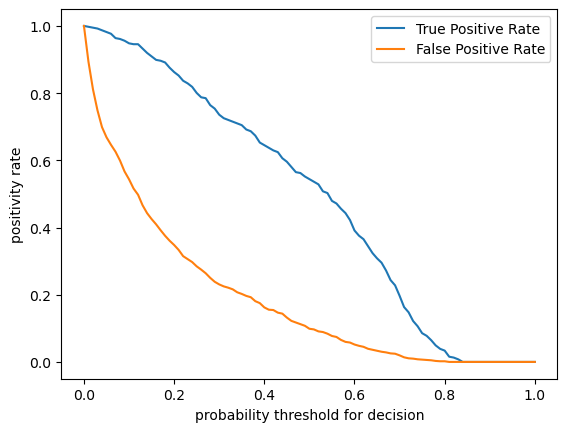

In [182]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='True Positive Rate')
plt.plot(df_scores.threshold, df_scores['fpr'], label='False Positive Rate')
plt.xlabel("probability threshold for decision")

plt.ylabel("positivity rate")
plt.legend()

### Random model
- flip a coin and that is your prediction.

In [183]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [184]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

- (above) the random model has an accuracy of 50%
- (below) function to create true positive rate and false positive rate for a range of different decision thresholds.

In [185]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [186]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand.head()

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,382,1013,4,10,0.989637,0.990225
2,0.02,379,993,7,30,0.981865,0.970674
3,0.03,375,979,11,44,0.971503,0.956989
4,0.04,372,969,14,54,0.963731,0.947214


Text(0, 0.5, 'positivity rate')

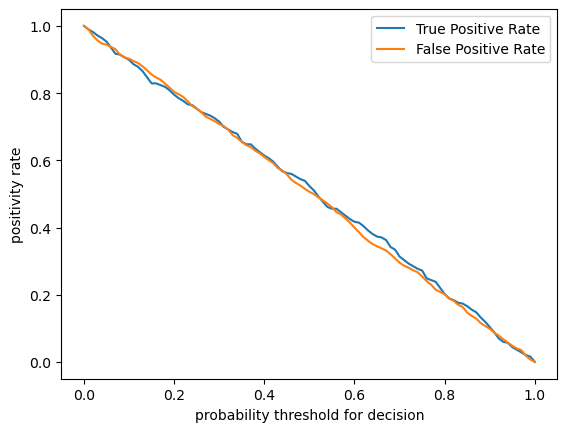

In [187]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='True Positive Rate')
plt.plot(df_rand.threshold, df_rand['fpr'], label='False Positive Rate')
plt.legend()

plt.xlabel("probability threshold for decision")

plt.ylabel("positivity rate")

### Ideal model
- imagine we had an ideal model and we order customers by their soft prediction value (their probability)
- ideally, this ordered list will have all non-churning customers first, followed by all the churning customers.
- in this ideal scenario, our decision rule would be around 0.72 because 72% of our validation set is non-churning customers.

In [188]:
n_neg = (y_val == 0).sum()
n_pos = (y_val == 1).sum()
n_neg, n_pos

(1023, 386)

In [189]:
y_ideal = np.repeat([0, 1], [n_neg, n_pos])

y_ideal_pred = np.linspace(0, 1, len(y_val))

print("hard predictions of ideal scenario: \n{}" .format(y_ideal[::10]))
print("soft predictions of ideal scenario: \n{}" .format(y_ideal_pred[::10]))

hard predictions of ideal scenario: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
soft predictions of ideal scenario: 
[0.         0.00710227 0.01420455 0.02130682 0.02840909 0.03551136
 0.04261364 0.04971591 0.05681818 0.06392045 0.07102273 0.078125
 0.08522727 0.09232955 0.09943182 0.10653409 0.11363636 0.12073864
 0.12784091 0.13494318 0.14204545 0.14914773 0.15625    0.16335227
 0.17045455 0.17755682 0.18465909 0.19176136 0.19886364 0.20596591
 0.21306818 0.22017045 0.22727273 0.234375   0.24147727 0.24857955
 0.25568182 0.26278409 0.26988636 0.27698864 0.28409091 0.29119318
 0.29829545 0.30539773 0.3125     0.31960227 0.32670455 0.33380682
 0.34090909 0.34801136 0.35511364 0.36221591 0.36931818 0.37642045
 0.38352273 0.390625   0.39772727 0.40

In [190]:
1 - y_val.mean() # observed proportion of non-churning customers.

0.7260468417317246

In [191]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

1.0

In [192]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


Text(0, 0.5, 'positivity rate')

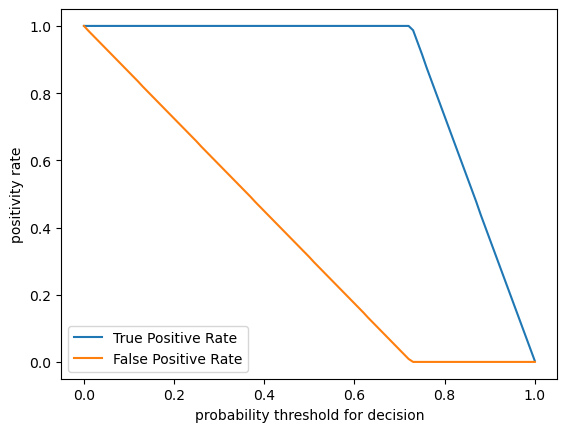

In [193]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='True Positive Rate')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='False Positive Rate')
plt.legend()

plt.xlabel("probability threshold for decision")

plt.ylabel("positivity rate")

### Putting everything together
- the curves for the random model are basically a straight diagonal line so we will hide below

Text(0, 0.5, 'positivity rate')

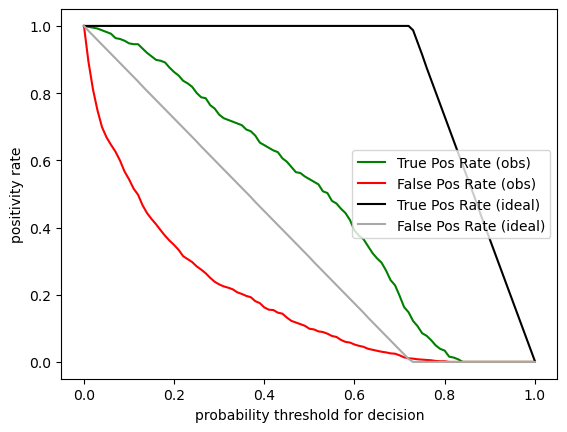

In [197]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='True Pos Rate (obs)', color='green')
plt.plot(df_scores.threshold, df_scores['fpr'], label='False Pos Rate (obs)', color='red')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='True Pos Rate (ideal)', color ='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='False Pos Rate (ideal)', color ='darkgrey')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='True Pos Rate (rand)', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='False Pos Rate (rand)', color='grey')

plt.legend()

plt.xlabel("probability threshold for decision")

plt.ylabel("positivity rate")

- (above) we want the red line to be close to the grey line, and the green line to be close to the black line 
- (above) note: the observed and ideal model above have different decision thresholds.

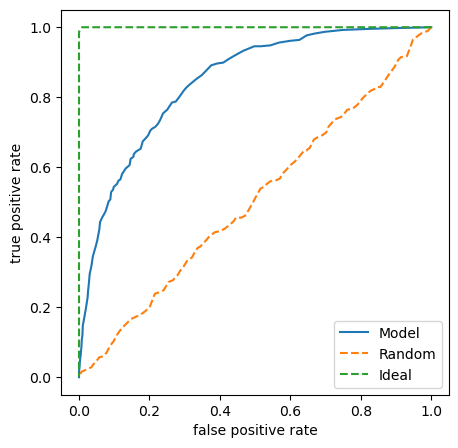

In [198]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, label='Random', linestyle='--')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal', linestyle='--')

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

plt.legend()

- in the above plot, the ideal curve (green) and the random curve (orange) have shapes that do not change.
- we can replace the random line with a line that starts at 0,0 and ends at 1,1

In [200]:
from sklearn.metrics import roc_curve

In [201]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

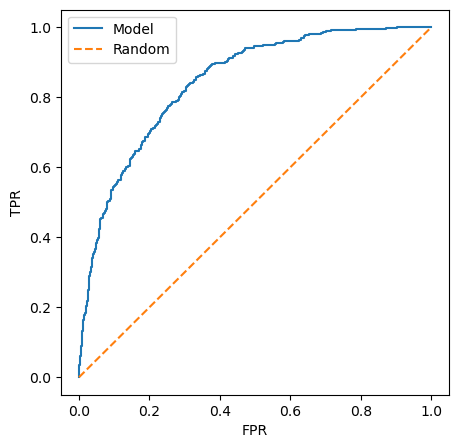

In [202]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

- (above) point 0,0: no false positives because we're assigning everything to class 0. 
- (above) point 0,0: No false negatives because we are getting all the true negative values by assigning EVERYTHING to class 0
- (above) point 1,1: high true positive rate because we're getting all the true positive values by assigning everything to class 1.
- (above) point 1,1: high false positive rate because we're making a lot of mistakes.
- (above) a good model looks like a rounded 90 degree corner.
- (above) a decent model looks like what we have.
- (above) a bad model will look similar to a diagonal curve.
- (above) if the model curve is inverted and below the diagonal line, then something went wrong. you probably need to switch your 1 and 0's.

## 4.6 ROC AUC

* Area under the ROC curve
* useful metric for evaluating binary classification models.
* AUC under the random curve (diagonal line) is 0.5
* AUC under the ideal curve (90 degree corner) is 1
* in other words, AUC ranges from 0.5 to 1.0
- **INTERPRETATION**: image you have your predictions and you have ordered them by their soft prediction value (probability)
    - now split this list into ordered subsets, one for those who churned and one for those who didn't.
    - AUC is the probabililty that the score is higher for a randomly selected positive (churn) observation than a randomly selected negative (non-churn) observation.

In [205]:
from sklearn.metrics import auc

- (below) AUC function from sci-kit learn works with ANY curve.

In [206]:
auc(fpr, tpr) # from function roc_curve(y_val, y_pred)

0.8438378435871333

In [207]:
auc(df_scores.fpr, df_scores.tpr) # from manual calculation

0.8438163179513671

In [208]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8438378435871333

- (below) roc_auc_score combines functionality of roc_curve(y_val, y_pred) and auc(fpr, tpr)

In [209]:
from sklearn.metrics import roc_auc_score

In [210]:
roc_auc_score(y_val, y_pred)

0.8438378435871333

- (below) an illustration of the interpretation explanation.

In [211]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [212]:
import random

In [213]:
n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.84413

- (below) the same illustration using numpy functions

In [214]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.84652

## 4.7 Cross-Validation

* Evaluating the same model on different subsets of data
* Getting the average prediction and the spread within predictions

In [ ]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [ ]:
dv, model = train(df_train, y_train, C=0.001)

In [ ]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [ ]:
y_pred = predict(df_val, dv, model)

**(below) K-Fold cross validation**
- before we've split data into train, validation, test
- here, combine train and validation sets into a full train set.
- Split the validation set into "K" different sets.
- usually we want large datasets to have K = 2 or 3, small datasets 5-10.
- Use K-1 sets to train a model to predict the last set.
- Do this K times.  For K = 3, train set 1 and 2 to predict 3, train set 2 and 3 to predict 1, train set 1 and 3 to predict 2.
- at each step, calculate ROC AUC
- at the end, summarize these K values with a mean score and st.dev

In [ ]:
from sklearn.model_selection import KFold

- (below) tqdm displays how long a for loop will take to complete.

In [ ]:
from tqdm.auto import tqdm

- (below) kfold.split() creates a generator that be iterated through by using the next() function.

- (below) the logistic regression function has a C hyperparameter.
- (below) hyperparameters instruct the model on how to choose parameters.
- (below) A high value of C tells the model to give high weight to the training data, and a lower weight to the complexity penalty. "Trust this training data a lot"
- (below) A low value tells the model to give more weight to this complexity penalty at the expense of fitting to the training data. "This data may not be fully representative of the real world data, so if it's telling you to make a parameter really large, don't listen to it".

In [ ]:
n_splits = 5
# Here we're using K fold to tune the C parameter.
# lower values of C are STRONGER regularization

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

In [ ]:
scores

In [ ]:
np.mean(scores), np.std(scores)

- (below) train final model with our tuned value for C.

In [ ]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

### Model Evaluation Summary

* Metric - a single number that describes the performance of a model
* Accuracy - fraction of correct answers; sometimes misleading 
* Precision and recall are less misleading when we have class inbalance
* ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
* K-Fold CV - more reliable estimate for performance (mean + std)

## 5 Insights and Code Snippets from Homework

In [ ]:
usecols = [
    'room_type', 'neighbourhood_group',
    'latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

data = pd.read_csv('C:/Users/jonsch/OneDrive/Statistics/Machine Learning/mlbookcamp-code-master/data_airBnB_NYC_2019.csv',
                  usecols = usecols)

- (below) check missing values...

In [ ]:
incomplete = data.isnull().sum()
print(incomplete)

- (below) and fill with zero...

In [ ]:
data['reviews_per_month']=data.reviews_per_month.fillna(0)

- (below) summarize numerical values...

In [ ]:
data.describe(include=[np.number]).T

- (below) turn a numerical variable into a categorical one...
  - one = above average price
  - zero = below average, or average price.
  - variable name = 'above_average'

In [ ]:
data_class = data.copy()
mean = data_class['price'].mean()

data_class['above_average'] = np.where(data_class['price']>=mean,1,0)

data_class = data_class.drop('price', axis=1)

- (below) a better way to look at correlation...

In [ ]:
data_numeric = data.copy()
data_numeric = data.drop(["neighbourhood_group","room_type", "price"], axis=1)
plt.figure(figsize=(15,10))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [ ]:
data_numeric.corr().unstack().sort_values(ascending = False)

- (below) feature elimination

In [ ]:
categorical = ['neighbourhood_group', 'room_type']
numerical = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
features = categorical + numerical

orig_score = accuracy # from full model

for c in features:
    # for each covariate c
    
    # take the feature vector and remove c
    subset = features.copy()
    subset.remove(c)
    
    # create the X matrix for training
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)
    # train the model
    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)
    
    # create the X matrix for validation
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    # get predictions for validation dataset
    y_pred = model.predict(X_val)
    
    # compare accuracy of validation predictions and validation truth
    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

- (above) smaller differences are better, higher accuracies are better.

- (below) Ridge Regression on the same dataset.
  - (below) setup first...

In [ ]:
data['price']=np.log1p(data['price'])
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

- (below) actual code for ridge regression, tuning the regularization parameter "A"

In [ ]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')

X_val = dv.transform(val_dict)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a,random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred)) # RMSE
    
    print(a, round(score, 3))

- (below) using AUC ROC for feature elimination
   - Recall we previously used AUC to evaluate prediction accuracy of a classification model with unequal class sizes.
     - fpr, tpr from function roc_curve(y_val, y_pred)
     - auc(fpr, tpr)
   - ROC AUC could also be used to evaluate feature importance of numerical variables. 
     - For each numerical variable, use it as score and compute AUC with the "default" variable
     -  Use the training dataset for that
     
   - If your AUC is < 0.5, invert this variable by putting "-" in front
       - (e.g. `-df_train['expenses']`)

   - AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%10s, %.5f' % (c, auc))

- (above) seniority has the highest AUC

 - (below) We can also plot the ROC curve for seniority
     - We can see that there's separation in distribution of seniority between positive and negative classes (this is what AUC tells us about)

In [ ]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.seniority)
plt.plot(fpr, tpr, label='+seniority')

fpr, tpr, _ = roc_curve(y_train, -df_train.seniority)
plt.plot(fpr, tpr, label='-seniority')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

In [ ]:
# plot defaulters, y = 1
sns.histplot(df_train.seniority[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')

# plot those in good standing, y = 0
sns.histplot(df_train.seniority[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

- (above) For negative examples (blue) the values of seniority tend to be higher. That's why AUC is below 0.5 - the correlation is negative. 

- (above) If we reverse the order by negating the values seniority, the positive examples will tend to have higher values than negative.
   - That's why AUC of "-seniority" is above 0.5

In [ ]:
# plot defaulters, y = 1
sns.histplot(-df_train.seniority[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
# plot those in good standing, y = 0
sns.histplot(-df_train.seniority[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

- (below) Now let's compute precision and recall for our model.

   - Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
   - For each threshold, compute precision and recall
   - Plot them

- (below) For the feature elimination exercise, use these columns only:
    - ['seniority', 'income', 'assets', 'records', 'job', 'home']

- (below) Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
columns = ['seniority', 'income', 'assets', 'records', 'job', 'home']

train_dicts = df_train[columns].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

# train the vectorizer for one-hot encoding
X_train = dv.fit_transform(train_dicts)

# train the model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[columns].to_dict(orient='records')

# DO NOT need to train the vectorizer again
X_val = dv.transform(val_dicts)

# use model to predict validation set
y_pred = model.predict_proba(X_val)[:, 1]

- (below) At what soft prediction value do we assign into a hard prediction?

In [ ]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

df_scores = confusion_matrix_dataframe(y_val, y_pred)

df_scores[::10] # show every 10 observations

In [ ]:
# create column for precision
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)

# create column for recall
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.vlines(0.4, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

- (above) At which threshold d0 precision and recall curves intersect (the grey vertical dashed line)

- (below) F1 score...

    - Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metric that takes into account both

     - This is the formula for computing F1:

        - $$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

        - Where $P$ is precision and $R$ is recall.
     - Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [ ]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.vlines(0.3, 0, 0.7, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [ ]:
df_scores.set_index('threshold').f1.idxmax()

- (below) Precision-recall curves show how precision depend on recall and vice-versa.
     - For that, plot recall on the X axis and precision on the Y axis

In [ ]:
plt.plot(df_scores.r, df_scores.p)

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.vlines(0.5, 0, 0.61, color='grey', linestyle='--', alpha=0.5)
plt.hlines(0.61, 0, 0.5, color='grey', linestyle='--', alpha=0.5)
plt.vlines(0.2, 0, 0.73, color='brown', linestyle='--', alpha=0.5)
plt.hlines(0.73, 0, 0.2, color='brown', linestyle='--', alpha=0.5)
plt.ylim(0, 1.05)
plt.show()

- (above) So if we want to retrieve 50% of relevant elements (e.g., catch 50% of defaulters) we can expect our model to be correct 61% of the time.

- (above) if we are okay with catching just 20% of defaulters, we can increase that expectation of our model to be correct 73% of the time.

- (below) Area under the PR curve is also a useful metric:

In [ ]:
from sklearn.metrics import auc

df_scores = df_scores.dropna()
auc(df_scores.r, df_scores.p)

 - (above) The closer it is to 1 the better. The ideal spot on the PR curve is (1, 1)

## 5 Explore more
### Logistic Regresion 

More things

* Try to exclude least useful features


Use scikit-learn in project of last week

* Re-implement train/val/test split using scikit-learn in the project from the last week
* Also, instead of our own linear regression, use `LinearRegression` (not regularized) and `RidgeRegression` (regularized). Find the best regularization parameter for Ridge

Other projects

* Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
* Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

### Model Evaluation

* Check the precision and recall of the dummy classifier that always predict "FALSE"
* F1 score = 2 * P * R / (P + R)
* Evaluate precision and recall at different thresholds, plot P vs R - this way you'll get the precision/recall curve (similar to ROC curve)
* Area under the PR curve is also a useful metric

Other projects:

* Calculate the metrics for datasets from the previous week